При загрузке данных в Excel оказалось, что данные для начала надо обработать для дальнейшей с ними работы.

In [2]:
import pandas as pd

# Загрузка CSV файла
file_path = "data.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Преобразование столбца с датами и временем из MDY в datetime-объект и перевод столбца с датой в формат DMY + время (это нужно для того, чтобы Excel правильно читал данные, так как реагиональные настройки 
# не хочется менять каждый раз в зависимости от даты, а формат MDY Excel не читает правильно)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M', errors='coerce')
data['InvoiceDate'] = data['InvoiceDate'].dt.strftime('%d/%m/%Y %H:%M')

# Удаляем строки с любым пропущенным значением
data = data.dropna()
# Добавляем столбец TotalPrice, который будет обозначать сумму, потраченную на товары и округлим для удобства до двух знаков после запятой
data['TotalPrice'] = round(data['Quantity'] * data['UnitPrice'],2)

# Список значений для удаления в столбце StockCode (я не знаю, как интерпретировать данные значения, поэтому это делается лишь для удобства) и удаляем
# строки, содержащие данные значения
values_to_remove = ['BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'POST','PADS']
data = data[~data['StockCode'].isin(values_to_remove)]
# Удаляем строки, которые в столбце Quantity содержат ненатуральные числа
data = data[data['Quantity'] > 0]


# Сохранение результата обратно в CSV
data.to_csv("converted_data2.csv", index=False, encoding='ISO-8859-1')

Интерес в этом наборе данных представляют столбцы Quantity и TotalPrice - то есть сколько товаров покупают и сколько в итоге тратя. Проведем разведовательный анализ данных - посмотрим, в каких странах больше покупают и
тратят, для этого воспользуемся сводными диаграммами Excel

Распределение покупок по странам

<img src="Country-Quantity.png" alt="Распределение покупок по странам" width="1000" height="600">





Распределение потраченных сумм на покупки по странам

<img src="Country-TotalPrice.png" alt="Распределение потраченных сумм на покупки по странам" width="1000" height="600">

Из этих графиков следует, что наибольшая часть покупок была сделана и наибольшая часть средств была потрачена в Великобритании. Можно упорядочить сводные таблицы и выяснить, какие страны больше всего закупок и сумм имели. 

Упорядочивание стран по убыванию закупок

<img src="Country-Quantity.jpg" alt="Упорядочивание стран по убыванию закупок" width="1200" height="600">

Упорядочивание стран по убыванию затрат на товары. 

<img src="Country-TotalPrice.jpg" alt="Упорядочивание стран по убыванию затрат на товары" width="1200" height="600">

Далее неплохо было бы рассмотреть зависимости количество покупок и потраченных сумм от времени. 

Распределение количества покупок по времени

<img src="InvoiceDate-Quantity.png" alt="Распределение количества покупок по времени" width="1200" height="600">

Распределение потраченных средств по времени

<img src="InvoiceDate-TotalPrice.png" alt="Распределение потраченных средств по времени" width="1200" height="600">

Тут мы видим, что в обоих графиках наибольшее количество покупок и сумм приходится на ноябрь, октябрь и сентябрь 2011 года. 

Теперь рассмотрим, какие товары больше всего покупались и на какие товары больше средств ушло. Для этого построим графики matplotlib.

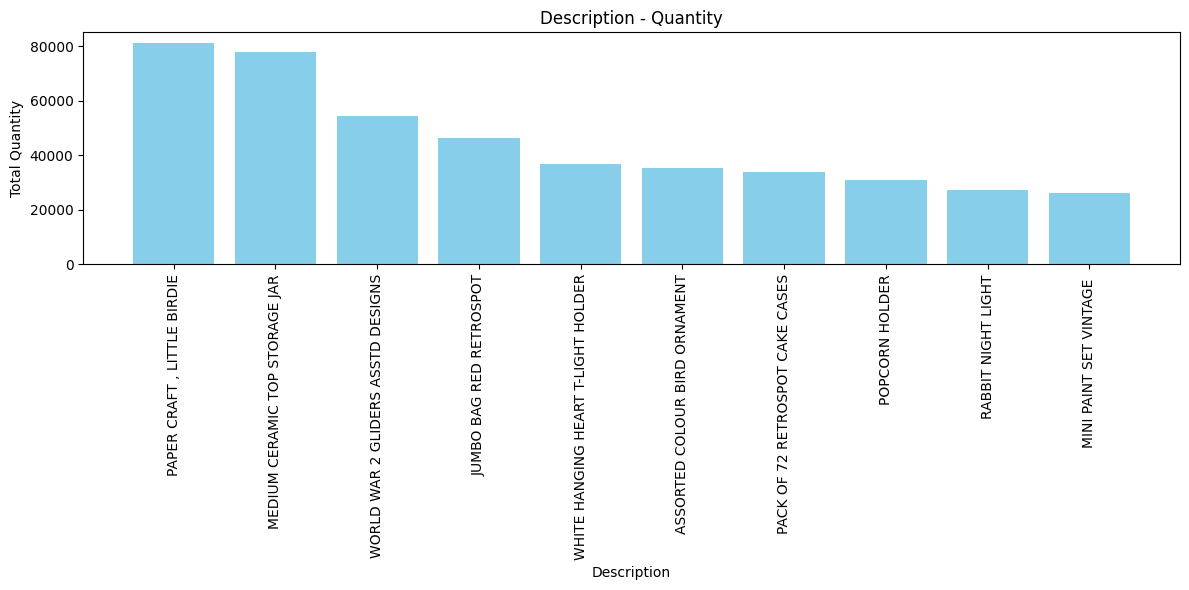

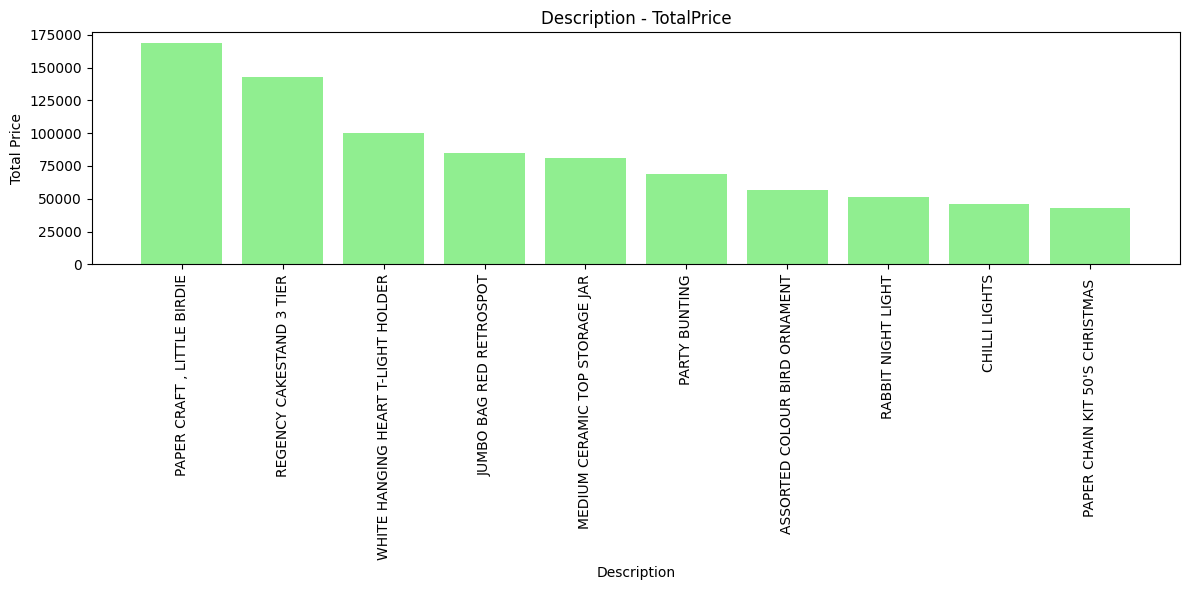

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Пример: агрегирование данных
# Сгруппируем данные по Description и посчитаем сумму для Quantity и TotalPrice
aggregated_data = data.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()
top_data = aggregated_data.nlargest(10, 'Quantity')  # Топ 10 по Quantity
top_data1 = aggregated_data.nlargest(10, 'TotalPrice')  # Топ 10 по Total Price
# Построение графика Description - Quantity
plt.figure(figsize=(12, 6))
plt.bar(top_data['Description'], top_data['Quantity'], color='skyblue')
plt.title('Description - Quantity')
plt.xlabel('Description')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)  # Поворот подписей на оси X для читаемости
plt.tight_layout()
plt.show()

# Построение графика Description - TotalPrice
plt.figure(figsize=(12, 6))
plt.bar(top_data1['Description'], top_data1['TotalPrice'], color='lightgreen')
plt.title('Description - TotalPrice')
plt.xlabel('Description')
plt.ylabel('Total Price')
plt.xticks(rotation=90)  # Поворот подписей на оси X для читаемости
plt.tight_layout()
plt.show()


По этим графикам видно, что больше средств и большее количество было куплено Paper Craft. Little birdie, однако в целом показатели отличаются, что довольно удивительно. 

Теперь посмотрим, какие покупатели больше всего купили и больше всего потратили. Построим графики в Power BI

Количество средств и товаров, купленных отдельными покупателями

<img src="CustomerID.jpg" alt="Распределение потраченных средств по времени" width="1200" height="600">